## Importing libraries

In [25]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.model_selection import cross_val_score,KFold

# importing visualization packages
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

# ingnoring the warnings
import warnings
warnings.filterwarnings('ignore')

## Data Accessing

In [2]:
df_flights=pd.read_csv(r'C:\Users\pavan\OneDrive\Desktop\Data Mining\Project\Flights.csv')

## Data Preprocessing

In [3]:
df_flights.shape

(300153, 12)

In [4]:
# displaying first 5 rows of data
df_flights.head().style.hide_index()

Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.330000,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.250000,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1,5955


In [5]:
# displaying last 5 rows of data
df_flights.tail().style.hide_index()

Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.080000,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.420000,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.830000,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.000000,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.080000,49,81585


In [6]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


### Dropping unnecessary column
<font size = "3"> The first column is unnamed and doesn't add any value for our analysis. So, dropping that column </font>

In [7]:
df_flights.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
# dispalying the statistical data of the attributes
df_flights.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20895.024787
std,7.191997,13.561004,22714.451273
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,191680.000000


### Checking for null and duplicate values

In [9]:
df_flights.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
df_flights[df_flights.duplicated()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


## Scatterplot to identify outliers

<AxesSubplot:xlabel='airline', ylabel='price'>

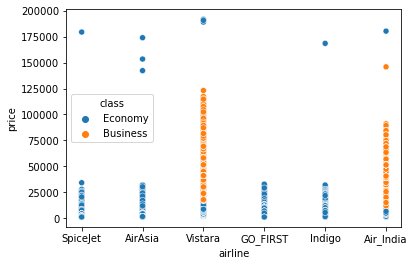

In [11]:
sns.scatterplot(data=df_flights,x='airline',y='price',hue='class')

## Dropping the outliers

In [12]:
Q1 = np.percentile(df_flights['price'],25,interpolation = 'midpoint')
Q3 = np.percentile(df_flights['price'],75,interpolation = 'midpoint')

IQR = Q3 - Q1
 
print("Old Shape: ", df_flights.shape)
 
# Upper bound
upper = np.where(df_flights['price'] >= (Q3+2.1*IQR))
# Lower bound
lower = np.where(df_flights['price'] <= (Q1-1.6*IQR))
 
# Removing the Outliers
df_flights.drop(upper[0], inplace = True)
df_flights.drop(lower[0], inplace = True)
 
print("New Shape: ", df_flights.shape)

Old Shape:  (300153, 11)
New Shape:  (300142, 11)


<AxesSubplot:xlabel='airline', ylabel='price'>

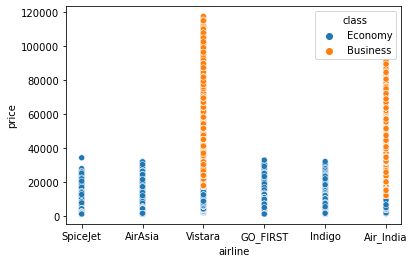

In [13]:
sns.scatterplot(data=df_flights,x='airline',y='price',hue='class')

<font size ="3">The unnamed column and outliers are redundant for our analysis.</font>
<font size ="3">The dataset is clean after dropping the unnamed column and outliers. Also, there aren't any null values or duplicates in the dataset</font>

### Modifying the 'stops' column

In [14]:
# Converting numeric word values to numeric digits in 'stops' column
# to show its correlation with other attributes.

f_stops = df_flights["stops"].values
f_price = df_flights["price"].values
f_class = df_flights["class"].values

for i in range(len(f_stops)):
    if f_stops[i] == "zero":
        f_stops[i] = 0
    elif f_stops[i] == "one":
        f_stops[i] = 1
    elif f_stops[i] == "two_or_more":
        if f_class[i]=="Economy":
            if f_price[i] >= 1966 and f_price[i] < 10000:
                f_stops[i] = 2
            elif f_price[i] >= 10000 and f_price[i] < 20000:
                f_stops[i] = 3
            elif f_price[i] >= 20000 and f_price[i] < 36000:
                f_stops[i] = 4
        else:
            if f_price[i] >= 12000 and f_price[i] < 35000:
                f_stops[i] = 2
            elif f_price[i] >= 35000 and f_price[i] < 60000:
                f_stops[i] = 3
            elif f_price[i] >= 60000 and f_price[i] < 118000:
                f_stops[i] = 4

In [15]:
df_flights["stops"]=f_stops

In [16]:
df_flights.tail().style.hide_index()

airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.080000,49,69265
Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.420000,49,77105
Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.830000,49,79099
Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10.000000,49,81585
Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.080000,49,81585


In [17]:
df_flights[['stops']] = df_flights[['stops']].apply(pd.to_numeric) 

## Correlation matrix

<AxesSubplot:>

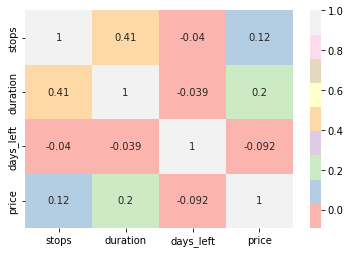

In [18]:
sns.heatmap(df_flights.corr(),cmap='Pastel1',annot=True)

## Histogram

array([[<AxesSubplot:title={'center':'stops'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'days_left'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

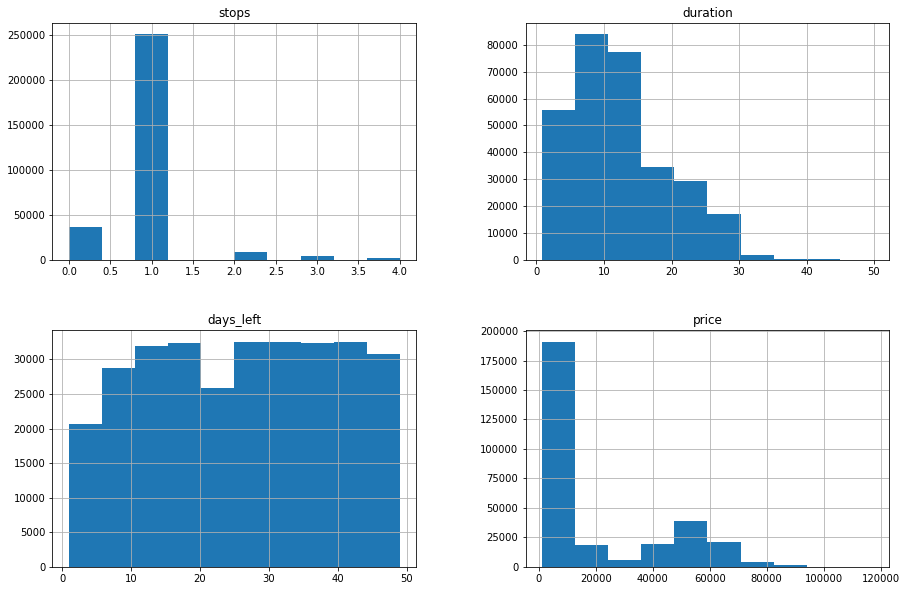

In [19]:
fig_size=plt.figure(figsize=(15,10))
hist1=fig_size.gca()
df_flights.hist(ax=hist1)

## Data Visualization

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_flights.columns:
    if df_flights[col].dtype=='object':
        df_flights[col]=le.fit_transform(df_flights[col])

In [21]:
X=df_flights.drop(['price'],axis=1)
y=df_flights['price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.333)

In [23]:
# from sklearn.preprocessing import MinMaxScaler
# mmscaler=MinMaxScaler(feature_range=(0,1))
# X_train=mmscaler.fit_transform(X_train)
# X_test=mmscaler.fit_transform(X_test)
# X_train=pd.DataFrame(X_train)
# X_test=pd.DataFrame(X_test)  

In [24]:
linreg=RandomForestRegressor()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

In [28]:
kf=KFold(shuffle=True, n_splits=5)
lr_score = np.mean(cross_val_score(linreg, X_train, y_train, cv=kf, scoring='r2'))
lr_score

0.9886123259690383

In [27]:
# from sklearn import metrics
# lr_r2=metrics.r2_score(y_test,y_pred)
# lr_r2

0.9889747375829911

In [ ]:
# rf_base_r2 = max(model_r2_compare.sort_values(by='Testing_R2_Score', ascending=Fals

In [29]:
# creating the parameter grid for the first round
param_grid_one = [
                  {'bootstrap':[False, True],
                  'n_estimators':[75, 100, 125, 150],
                  'max_features':[2, 4, 6, 8, 10]}
                  ]



In [31]:
# initializing the first grid search
grid_search_one = GridSearchCV(linreg, param_grid_one, cv=5, scoring='r2', return_train_score=True)



In [ ]:
# fitting the first grid search to the training data
grid_search_one.fit(X_train, y_train)

In [ ]:
grid_search_one.best_params_

In [39]:
random_forest_regressor = RandomForestRegressor(bootstrap=True, max_features=10, n_estimators=125)
model = random_forest_regressor.fit(X_train, y_train)
print(f'\nTesting the {random_forest_regressor} model')

grid_one_test_predictions = model.predict(X_test)

grid_one_r2 = r2_score(y_test, grid_one_test_predictions)

grid_one_r2
     


Testing the RandomForestRegressor(max_features=10, n_estimators=125) model


0.9889695853064868